In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from classes import Paths


pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", 30)

In [2]:
paths = Paths()
path = paths.discard_noise_feats_sample
df = pd.read_csv(path)
print(df.shape)
df.head(10)

(1636, 311)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,...,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,target
0,-0.92,-0.31,-0.69,0.77,0.09,44800,1.38,42902,-0.40,0.51,-1.58,-0.35,0.01,0.98,-0.33,...,38603,0.07,2013,0.82,1.25,49118,43122,-0.99,-0.68,-0.07,8006,-0.17,0.40,173,gear_stick
1,1.41,0.32,0.88,0.10,1.27,2097,-0.53,19640,0.25,1.12,0.93,0.52,0.91,-1.92,-0.11,...,37028,0.77,2019,-2.00,0.70,23477,26027,0.20,0.24,-0.13,9512,0.82,1.28,173,wheel_shake
2,0.91,0.65,0.62,0.48,0.77,21520,0.88,7491,1.07,0.58,-1.02,-1.60,-1.06,-0.10,1.66,...,29212,-1.05,2015,1.02,1.30,19738,5099,1.53,0.18,0.69,35420,0.99,0.16,170,break_bug
3,-0.53,-0.89,-0.12,-0.76,-0.81,7649,0.61,12421,-1.78,0.21,1.25,-0.27,1.11,-1.31,-0.68,...,26223,-0.04,2018,0.56,0.26,27290,17042,-1.84,-0.76,-0.10,36626,0.87,-2.71,170,another_bug
4,0.05,0.65,-2.51,0.51,-0.76,27745,0.00,38967,1.08,1.46,-0.15,1.31,-0.04,-0.78,-0.33,...,2602,-0.33,2021,-1.97,-0.45,43419,6234,-0.97,-0.62,0.91,35750,0.08,-0.07,173,electro_bug
5,-0.68,-1.01,-0.57,0.41,0.15,31133,-0.41,3203,1.74,1.52,-0.34,0.30,1.80,-1.10,-0.47,...,20821,0.89,2019,1.09,-0.99,36047,16836,-0.89,-1.76,0.65,40789,-0.87,1.79,170,engine_fuel
6,1.09,-1.10,0.70,0.07,0.47,40764,0.67,36420,-0.65,0.75,0.77,1.15,-2.67,-0.67,0.31,...,28951,1.06,2020,0.04,0.39,25704,35436,-2.17,1.15,0.44,2503,0.16,-0.75,171,engine_check
7,1.12,-0.01,0.42,-0.82,-0.86,9258,0.97,14458,-0.20,-2.37,1.38,-0.19,-0.34,-0.88,0.35,...,41663,-1.32,2016,0.24,-0.33,37991,2883,-1.26,0.73,-0.78,21872,-0.79,0.55,172,another_bug
8,-0.11,0.05,0.25,-0.03,2.04,25333,-0.03,15032,-1.22,-1.81,-0.60,2.06,-0.64,0.75,0.50,...,22453,0.14,2013,1.65,1.10,46676,22806,0.83,-0.65,-0.09,29290,0.64,-0.85,170,wheel_shake
9,-0.41,-1.08,1.36,0.85,0.74,14014,-0.71,14726,1.88,-0.71,-0.69,0.46,0.15,-0.41,-1.20,...,6973,0.21,2014,2.48,0.08,3825,7071,-0.78,-1.67,1.14,3999,-0.65,1.04,172,wheel_shake


In [3]:
from sklearn.model_selection import train_test_split
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [4]:
drop_cols = ['target']
cat_cols = []

X = df.drop(drop_cols, axis=1, errors = 'ignore')
y = df['target'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# initialize Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 3
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 8, # number of trials to perform
    verbose=1
)
# fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_train), np.array(y_train))
# print results
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
red_area = X_train.columns[~(boruta.support_ | boruta.support_weak_)].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
print('features in the red area:', red_area)

Iteration: 1 / 8
Iteration: 2 / 8
Iteration: 3 / 8
Iteration: 4 / 8
Iteration: 5 / 8
Iteration: 6 / 8
Iteration: 7 / 8


BorutaPy finished running.

Iteration: 	8 / 8
Confirmed: 	0
Tentative: 	6
Rejected: 	304
features in the green area: []
features in the blue area: ['feature_59', 'feature_127', 'feature_141', 'feature_203', 'feature_234', 'feature_309']
features in the red area: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_

In [6]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,...,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,target
0,-0.92,-0.31,-0.69,0.77,0.09,44800,1.38,42902,-0.40,0.51,-1.58,-0.35,0.01,0.98,-0.33,...,38603,0.07,2013,0.82,1.25,49118,43122,-0.99,-0.68,-0.07,8006,-0.17,0.40,173,gear_stick
1,1.41,0.32,0.88,0.10,1.27,2097,-0.53,19640,0.25,1.12,0.93,0.52,0.91,-1.92,-0.11,...,37028,0.77,2019,-2.00,0.70,23477,26027,0.20,0.24,-0.13,9512,0.82,1.28,173,wheel_shake
2,0.91,0.65,0.62,0.48,0.77,21520,0.88,7491,1.07,0.58,-1.02,-1.60,-1.06,-0.10,1.66,...,29212,-1.05,2015,1.02,1.30,19738,5099,1.53,0.18,0.69,35420,0.99,0.16,170,break_bug
3,-0.53,-0.89,-0.12,-0.76,-0.81,7649,0.61,12421,-1.78,0.21,1.25,-0.27,1.11,-1.31,-0.68,...,26223,-0.04,2018,0.56,0.26,27290,17042,-1.84,-0.76,-0.10,36626,0.87,-2.71,170,another_bug
4,0.05,0.65,-2.51,0.51,-0.76,27745,0.00,38967,1.08,1.46,-0.15,1.31,-0.04,-0.78,-0.33,...,2602,-0.33,2021,-1.97,-0.45,43419,6234,-0.97,-0.62,0.91,35750,0.08,-0.07,173,electro_bug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,-0.96,-0.70,-0.04,0.24,-1.75,13201,0.91,39896,0.33,-1.05,2.46,-0.57,1.22,0.05,-0.26,...,20287,-0.34,2012,0.55,1.12,37689,13329,-0.57,0.19,-0.54,16087,-0.49,-0.35,172,gear_stick
1632,0.09,-0.61,1.30,0.72,-0.04,46709,-0.35,17423,0.78,-1.61,-0.31,1.88,-0.73,0.87,-1.22,...,49674,0.73,2018,1.71,-0.04,18623,28892,0.65,-0.60,-0.96,38816,-1.60,-2.95,171,gear_stick
1633,-0.58,-1.05,-1.05,0.16,1.64,26344,-0.17,47545,0.35,0.51,1.38,0.33,0.10,-0.01,-0.22,...,25119,0.46,2020,-0.99,-1.41,23284,22642,-1.22,-1.03,0.82,27475,-0.30,1.88,170,another_bug
1634,1.07,-1.03,-0.53,-0.52,-1.34,42592,0.16,27582,0.15,0.65,-0.28,-0.22,1.44,-0.66,-0.22,...,22792,-0.49,2011,1.87,-0.87,23016,42662,-1.15,0.24,0.84,19920,0.32,-0.05,174,electro_bug


In [10]:
feature_scores.index

Index(['feature_59', 'feature_141', 'feature_234', 'feature_309', 'feature_54',
       'feature_127', 'feature_203', 'feature_188', 'feature_229',
       'feature_192',
       ...
       'feature_154', 'feature_143', 'feature_247', 'feature_53', 'feature_95',
       'feature_212', 'feature_246', 'feature_223', 'feature_134',
       'feature_285'],
      dtype='object', length=310)

/var/folders/fb/453r9d2j24g8x8tc93n2k6600000gn/T/ipykernel_58386/1213847755.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index[:50])


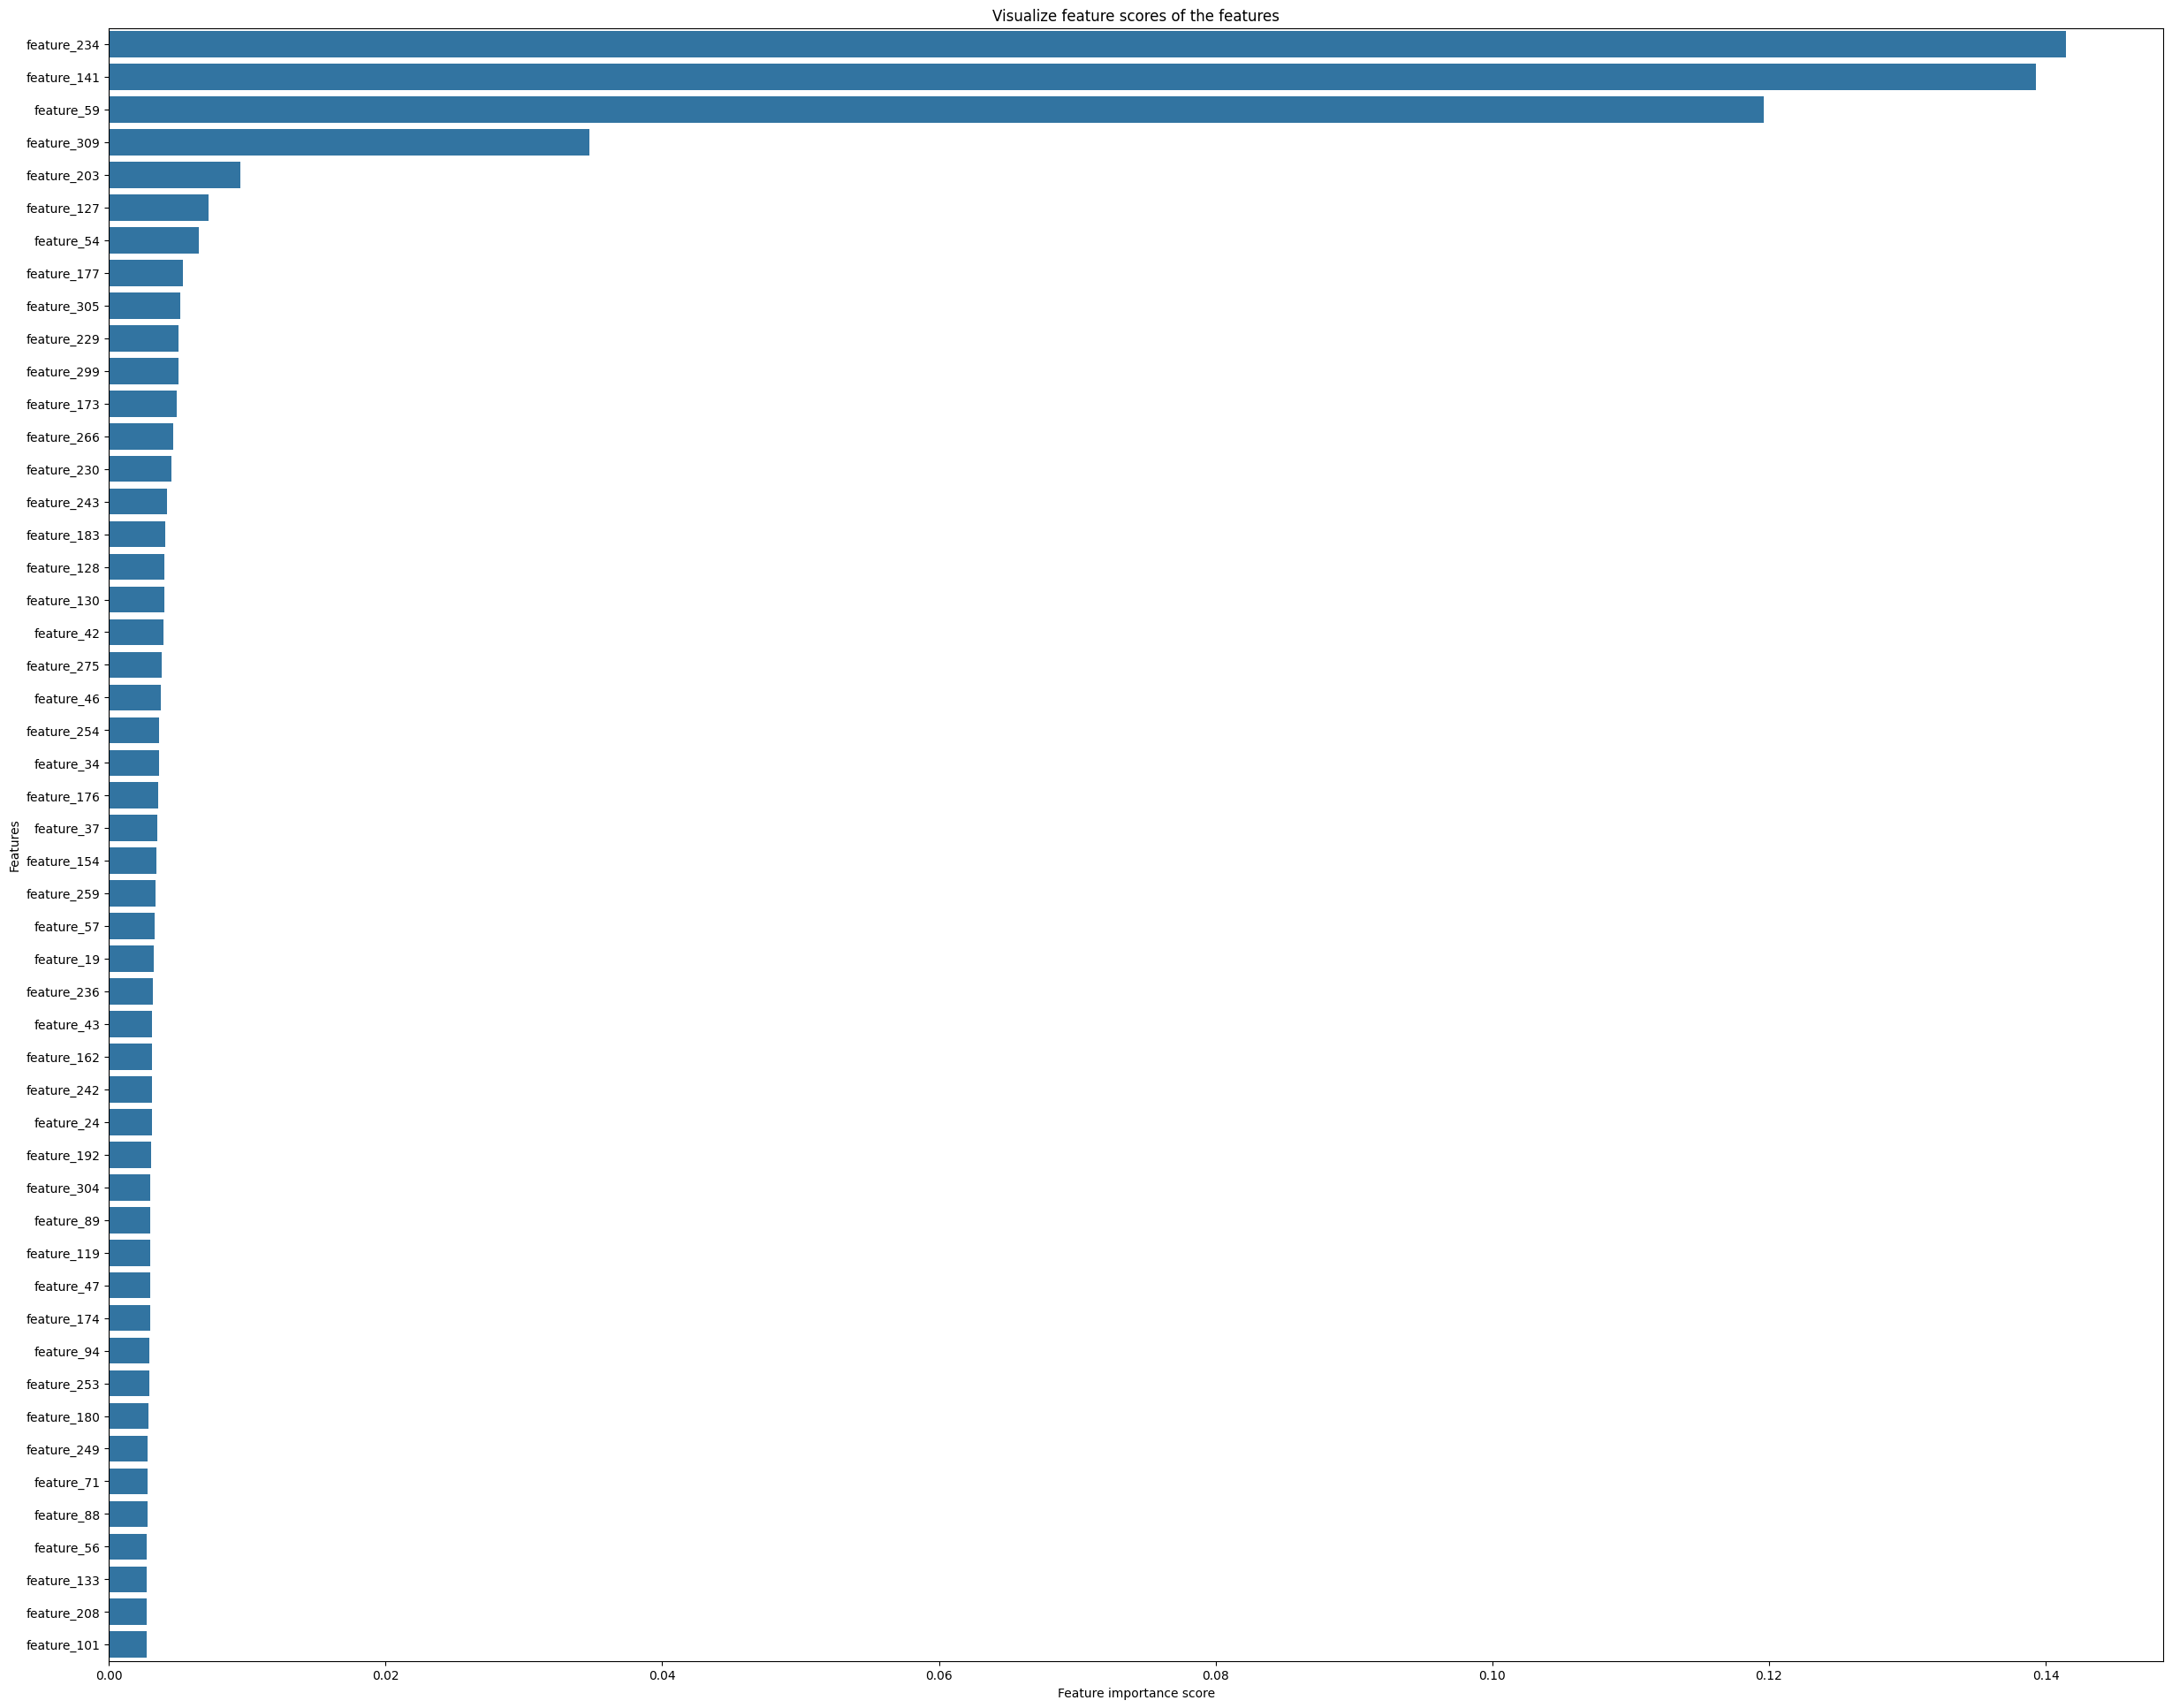

In [22]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)
len(rf.feature_importances_)
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# feature_scores
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores[:50], y=feature_scores.index[:50], data=pd.DataFrame(feature_scores).iloc[:50])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:50])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [24]:
for i in feature_scores.index[:10].to_list():
    print(i)

feature_234
feature_141
feature_59
feature_309
feature_203
feature_127
feature_54
feature_177
feature_305
feature_229


<div class="alert alert-info">

feature_141  
feature_203  
feature_59  
feature_234  
feature_309  

In [25]:
tmp = []
tmp.append(1)
tmp

[1]

In [26]:
list((1,2,3))

[1, 2, 3]

In [27]:
tmp = []
tpl = ()
for i in range(len(X_train.columns)):
    tpl = (X_train.columns[i], boruta.ranking_[i])
    tmp.append(tpl)
tmp_2 = []
for i in tmp:
    if i[1] <= 10:
        tmp_2.append(i)
tmp_2

[('feature_59', 2),
 ('feature_81', 6),
 ('feature_110', 6),
 ('feature_127', 2),
 ('feature_130', 9),
 ('feature_141', 2),
 ('feature_142', 4),
 ('feature_173', 8),
 ('feature_203', 2),
 ('feature_205', 3),
 ('feature_234', 2),
 ('feature_297', 10),
 ('feature_305', 4),
 ('feature_309', 2)]

In [28]:
for i in tmp_2:
    print(i[0])

feature_59
feature_81
feature_110
feature_127
feature_130
feature_141
feature_142
feature_173
feature_203
feature_205
feature_234
feature_297
feature_305
feature_309


In [29]:
boruta.ranking_[300]

65

<div class="alert alert-info">

### **2. BoostARoota**

In [30]:
from boostaroota import BoostARoota
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [31]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
br = BoostARoota(metric='logloss', silent=True, cutoff=0.8)

# fit the model for the subset of variables
# br.fit(X_train, y_train_enc)

In [32]:
br.fit(X_train, y_train_enc)

In [33]:
pd.DataFrame(br.keep_vars_)

,feature
28,feature_0
29,feature_1
30,feature_10
31,feature_100
32,feature_104
33,feature_113
35,feature_123
36,feature_127
37,feature_128
38,feature_141


In [34]:
br?

Type:        BoostARoota
String form: <boostaroota.boostaroota.BoostARoota object at 0x177f75730>
File:        ~/dev/comp-ds/.venv/lib/python3.12/site-packages/boostaroota/boostaroota.py
Docstring:   <no docstring>